In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.cubehelix_palette(start=.5, rot=-.75)

[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037],
 [0.6081786671884791, 0.7816177694090097, 0.6017787295654944],
 [0.39493837953687966, 0.6591653753197486, 0.5567106633592679],
 [0.2775060539006816, 0.4896743690748741, 0.5382978119096076],
 [0.23232402880291025, 0.29085707267476174, 0.4444839422076804],
 [0.17250549177124488, 0.11951843162770594, 0.24320155229883056]]

In [6]:
print(sns.cubehelix_palette(start=.5, rot=-.75).as_hex())

['#d7dfc0', '#9bc799', '#65a88e', '#477d89', '#3b4a71', '#2c1e3e']


In [7]:
def read_map(filename):
    
    hdu = fits.open(inputdir+filename)
    data = hdu[0].data

    return data


In [8]:
def reg(n):

    #spaxel range (xa,ya), (xb,yb)     
    if n==1:
        xa, ya, xb, yb = 6, 6, 11, 14        
    elif n==2:
        xa, ya, xb, yb = 11, 6, 16, 15
    elif n==3:
        xa, ya, xb, yb = 6, 1, 16, 6
    elif n==4:
        xa, ya, xb, yb = 16, 23, 25, 30
    else:
        xa, ya, xb, yb = 19, 19, 28, 24
        
    return xa, ya, xb, yb


In [9]:
def set_plot():
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.rcParams['font.family'] = 'sans-serif'
    
    ax.set_xlim([-2.2, 1.8])
    ax.set_ylim([-2.2, 3.5])
    
    # demarcations
    ax.axvline(x=-0.4, ymin=0.47, ymax=3, color='k', linestyle=':', linewidth=0.8, alpha=0.8)   #SF
    ax.axhline(y=0.47, xmin=-2, xmax=1.5, color='k', linestyle=':', linewidth=0.8,alpha=0.8)  # AGN
    
    ax.text(-1.8, 3, 'Star-forming', color='k', fontstyle='italic', alpha=0.9, fontsize=9)
    ax.text(1, 0.7, 'AGN', color='k', fontstyle='italic', alpha=0.9, fontsize=9)
    ax.text(-1.5, -1.6, 'Passive', color='k', fontstyle='italic', alpha=0.9, fontsize=9)

    
    ax.set_xlabel(r'log$_{10}$ [NII]/H $\alpha$',fontsize=12, labelpad=8)
    ax.set_ylabel(r'log$_{10}$ W$_{H\alpha}$ [$\AA$]',fontsize=12, labelpad=5)


    return fig, ax
    

In [30]:
def plot(figure, axis, logratio,logeq):
    
    
    region = [1,2,3,4,5]
    c = ['#395d9c', 'paleturquoise', '#60ceac', 'pink']
    m = ['o', 'D', '^', 'o']
    l = ['region A', 'region B', 'region C', 'region D']
    f= ['#395d9c', 'paleturquoise', '#60ceac', 'none']
    
    
    for k in range(4):
        
        log_ratio = []
        log_eq = []
    
        if k < 3:
            x1, y1, x2, y2 = reg(region[k])
            for i in range(x1,x2): 
                for j in range(y1,y2):          
                    #n=n+1    #count spaxels
                    #plt.scatter(logratio[i,j], logeq[i,j], s=10, marker='o', color='red')
                    log_ratio.append(logratio[i,j])
                    log_eq.append(logeq[i,j])

        if k==3:
            
            x1, y1, x2, y2 = reg(region[3])
            for i in range(x1,x2): 
                for j in range(y1,y2):          
                    #n=n+1    #count spaxels
                    #plt.scatter(logratio[i,j], logeq[i,j], s=10, marker='o', color='red')
                    log_ratio.append(logratio[i,j])
                    log_eq.append(logeq[i,j])
                    
            x1, y1, x2, y2 = reg(region[4])
            for i in range(x1,x2): 
                for j in range(y1,y2):          
                    #n=n+1    #count spaxels
                    #plt.scatter(logratio[i,j], logeq[i,j], s=10, marker='o', color='red')
                    log_ratio.append(logratio[i,j])
                    log_eq.append(logeq[i,j])
                    
                    
        
        axis.scatter(log_ratio, log_eq, s=30, marker=m[k], color=c[k], label=l[k], facecolor=f[k])  
        axis.legend(loc='upper right', prop = { "weight": 'bold', "size" : 8})
    
        

In [ ]:
inputdir = '/Users/orion/phd_research/3C297/WHAN_diagnostic/'

In [19]:
log_ratio_N = read_map('logRatio_narrow.fits')
log_eqw_N = read_map('logEqW_narrow.fits')

In [20]:
print(log_ratio_N.shape, log_eqw_N.shape)

(30, 34) (30, 34)


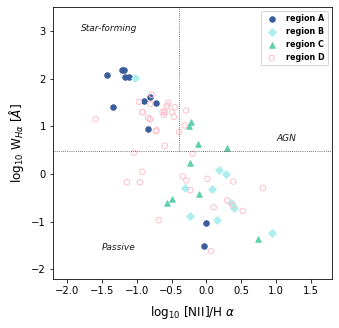

In [31]:
f, a = set_plot()
plot(f, a, log_ratio_N, log_eqw_N)

plt.savefig('whan_narrow.pdf', dpi=1000, bbox_inches='tight')